In [18]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [19]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "/Users/zan/Desktop/Data Analytics Course/CryptoClustering/Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [20]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [50]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [22]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file

scaler = StandardScaler()
df_market_data_scaled = scaler.fit_transform(df_market_data)

df_market_data_scaled = pd.DataFrame(
    df_market_data_scaled,
    columns=df_market_data.columns,
    index=df_market_data.index
)

df_market_data_scaled.head()


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


In [23]:
print(df_market_data.columns)


Index(['price_change_percentage_24h', 'price_change_percentage_7d',
       'price_change_percentage_14d', 'price_change_percentage_30d',
       'price_change_percentage_60d', 'price_change_percentage_200d',
       'price_change_percentage_1y'],
      dtype='object')


In [24]:
# Create a DataFrame with the scaled data
df_scaled = pd.DataFrame(
    df_market_data_scaled,
    columns=df_market_data.columns 
)

# Copy the crypto names from the original DataFrame
crypto_ids = [f"Crypto_{i+1}" for i in range(len(df_scaled))]


# Set the coin_id column as index
df_scaled["name"] = crypto_ids
df_scaled.set_index("name", inplace=True)


# Display the scaled DataFrame
df_scaled.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
name,,,,,,,
Crypto_1,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
Crypto_2,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
Crypto_3,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
Crypto_4,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
Crypto_5,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


---

### Find the Best Value for k Using the Original Scaled DataFrame.

In [25]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))

print(k_values)


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


In [26]:
# Create an empty list to store the inertia values
inertia = []


# Create a for loop to compute the inertia with each possible value of k

# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_scaled`
# 3. Append the model.inertia_ to the inertia list

for k in range(1, 12): 
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_market_data_scaled)
    inertia.append(kmeans.inertia_)

print(inertia)


[287.0, 212.1233420748626, 170.19357087970295, 79.02243535120975, 71.0979135124442, 66.1088267804475, 54.48812315624117, 43.224692666580424, 32.86088447122681, 28.404884636873092, 24.1161984214092]


In [27]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {
    "k": list(range(1, 12)),  
    "inertia": inertia     
}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)

elbow_df.head()

,k,inertia
0,1,287.000000
1,2,212.123342
2,3,170.193571
3,4,79.022435
4,5,71.097914


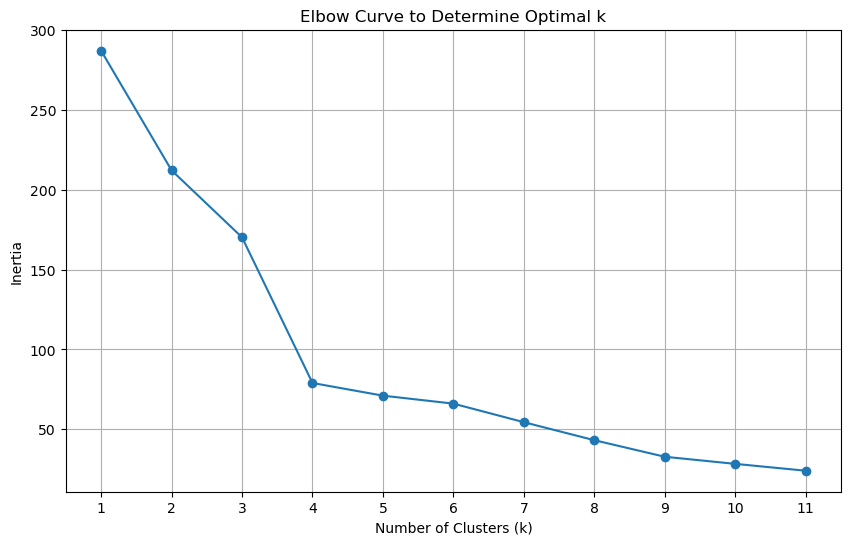

In [51]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.
elbow_data = {
    "k": list(range(1, 12)), 
    "inertia": inertia      
}
df_elbow = pd.DataFrame(elbow_data)

plt.figure(figsize=(10, 6))
plt.plot(df_elbow["k"], df_elbow["inertia"], marker='o')
plt.title("Elbow Curve to Determine Optimal k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.xticks(range(1, 12))  
plt.grid(True)
plt.show()


#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** The best k value is 4. Four is the best k value because this is the point where the slope has the greatest change in the graph above.

---

### Cluster Cryptocurrencies with K-means Using the Original Scaled DataFrame

In [52]:
# Initialize the K-Means model using the best value for k
best_k = 4  
kmeans_model = KMeans(n_clusters=best_k, random_state=42)

kmeans_model


KMeans(n_clusters=4, random_state=42)

In [53]:
# Fit the K-Means model using the scaled DataFrame
kmeans_model.fit(df_market_data_scaled)

# The model is now trained and ready for clustering analysis
cluster_labels = kmeans_model.predict(df_market_data_scaled)

print(cluster_labels)


[0 0 2 2 0 0 0 0 0 2 2 2 2 0 2 0 2 2 0 2 2 0 2 2 2 2 2 2 0 2 2 2 3 0 2 2 1
 2 2 2 2]


In [54]:
# Predict the clusters to group the cryptocurrencies using the scaled DataFrame
cluster_labels = kmeans_model.predict(df_market_data_scaled)

# Print the resulting array of cluster values.
print("Cluster Labels:", cluster_labels)


Cluster Labels: [0 0 2 2 0 0 0 0 0 2 2 2 2 0 2 0 2 2 0 2 2 0 2 2 2 2 2 2 0 2 2 2 3 0 2 2 1
 2 2 2 2]


In [55]:
# Create a copy of the scaled DataFrame
df_clustered = df_scaled.copy()

df_clustered.head()


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
name,,,,,,,
Crypto_1,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
Crypto_2,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
Crypto_3,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
Crypto_4,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
Crypto_5,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


In [56]:
# Add a new column to the copy of the scaled DataFrame with the predicted clusters
df_clustered["Cluster"] = cluster_labels

# Display the copy of the scaled DataFrame
df_clustered.head()


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,Cluster
name,,,,,,,,
Crypto_1,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,0
Crypto_2,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,0
Crypto_3,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,2
Crypto_4,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,2
Crypto_5,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,0


In [57]:
# Create a scatter plot using hvPlot by setting
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Color the graph points with the labels found using K-Means and
# add the crypto name in the `hover_cols` parameter to identify
# the cryptocurrency represented by each data point.
scatter_plot = df_clustered.hvplot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    c="Cluster", 
    colormap="Category10",
    hover_cols=["Cluster"] 
)

scatter_plot


:Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,Cluster)

---

### Optimize Clusters with Principal Component Analysis.

In [58]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)

print(pca)


PCA(n_components=3)


In [59]:
# Use the PCA model with `fit_transform` to reduce the original scaled DataFrame
# down to three principal components.
pca_data = pca.fit_transform(df_market_data_scaled)
df_pca = pd.DataFrame(
    pca_data,
    columns=["PC1", "PC2", "PC3"],  # Naming the principal components
    index=df_scaled.index           # Retain the original index
)

# View the scaled PCA data
df_pca.head()

,PC1,PC2,PC3
name,,,
Crypto_1,-0.600667,0.842760,0.461595
Crypto_2,-0.458261,0.458466,0.952877
Crypto_3,-0.433070,-0.168126,-0.641752
Crypto_4,-0.471835,-0.222660,-0.479053
Crypto_5,-1.157800,2.041209,1.859715


In [60]:
# Retrieve the explained variance to determine how much information
# can be attributed to each principal component.

pca_data = pca.fit_transform(df_market_data_scaled)

pca_df = pd.DataFrame(
    pca_data,
    columns=["PC1", "PC2", "PC3"]  # Principal Component 1, 2, and 3
)
explained_variance = pca.explained_variance_ratio_

print("Explained Variance Ratio:", explained_variance)

total_explained_variance = explained_variance.sum()
print("Total Explained Variance:", total_explained_variance)



Explained Variance Ratio: [0.3719856  0.34700813 0.17603793]
Total Explained Variance: 0.8950316570309842


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** 

In [61]:
# Create a new DataFrame with the PCA data.
pca_df = pd.DataFrame(
    pca_data,  # The PCA-transformed data
    columns=["PC1", "PC2", "PC3"]  # Name the principal components
)

# Copy the crypto names from the original scaled DataFrame
crypto_ids = [f"Crypto_{i+1}" for i in range(len(pca_df))]
pca_df["coin_id"] = crypto_ids


# Set the coin_id column as index
pca_df.set_index("coin_id", inplace=True)

# Display the scaled PCA DataFrame
pca_df.head()

,PC1,PC2,PC3
coin_id,,,
Crypto_1,-0.600667,0.842760,0.461595
Crypto_2,-0.458261,0.458466,0.952877
Crypto_3,-0.433070,-0.168126,-0.641752
Crypto_4,-0.471835,-0.222660,-0.479053
Crypto_5,-1.157800,2.041209,1.859715


---

### Find the Best Value for k Using the Scaled PCA DataFrame

In [62]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))

print(k_values)


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


In [63]:
# Create an empty list to store the inertia values
inertia = []


# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_pca`
# 3. Append the model.inertia_ to the inertia list


for k in range(1, 12):  
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_df)
    inertia.append(kmeans.inertia_)

print("Inertia values:", inertia)


Inertia values: [256.8740855678926, 182.3395300777565, 140.43183298408368, 49.66549665179738, 42.05190109791727, 31.74900524438903, 28.031869172552764, 19.45174720604136, 13.814081971558103, 10.63064757387097, 10.120242629957763]


In [64]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {
    "k": list(range(1, 12)), 
    "inertia": inertia    
}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)
df_elbow.head()


,k,inertia
0,1,256.874086
1,2,182.339530
2,3,140.431833
3,4,49.665497
4,5,42.051901


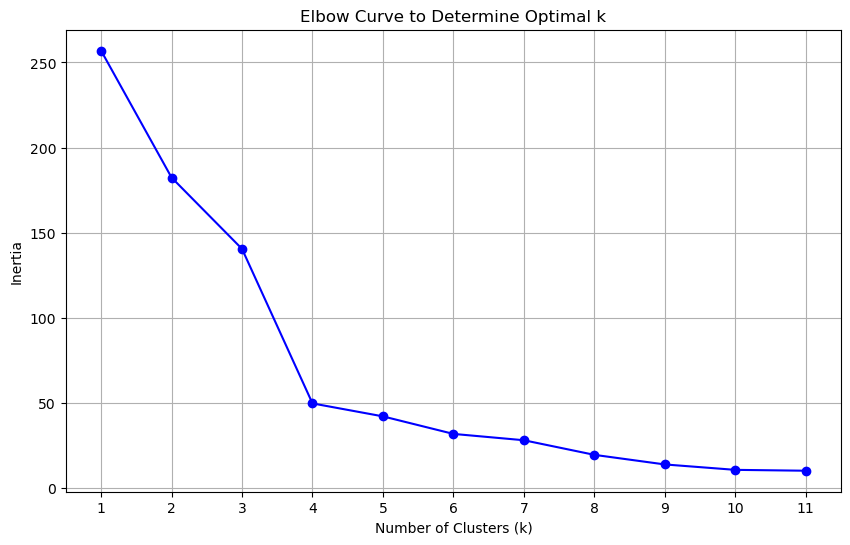

In [65]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.

plt.figure(figsize=(10, 6))
plt.plot(df_elbow["k"], df_elbow["inertia"], marker='o', linestyle='-', color='b')
plt.title("Elbow Curve to Determine Optimal k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.xticks(range(1, 12)) 
plt.grid(True)
plt.show()


#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** Similar to the previous graph, the best value for k is 4. The reasoning is the same. At 4 the slope of the elbow curve has the most drastic change. 


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** As mentioned aboce, the k value is the same as the original date.

### Cluster Cryptocurrencies with K-means Using the Scaled PCA DataFrame

In [66]:
# Initialize the K-Means model using the best value for k

best_k = 4
kmeans_model = KMeans(n_clusters=best_k, random_state=42)

print(kmeans_model)


KMeans(n_clusters=4, random_state=42)


In [67]:
# Fit the K-Means model using the PCA data
kmeans_model.fit(pca_df)

# The model is now trained and ready for clustering analysis


KMeans(n_clusters=4, random_state=42)

In [68]:
# Predict the clusters to group the cryptocurrencies using the scaled PCA DataFrame
pca_cluster_labels = kmeans_model.predict(pca_df)

# Print the resulting array of cluster values.
print("Cluster Labels:", pca_cluster_labels)


Cluster Labels: [0 0 2 2 0 0 0 0 0 2 2 2 2 0 2 0 2 2 0 2 2 0 2 2 2 2 2 2 0 2 2 2 3 0 2 2 1
 2 2 2 2]


In [69]:
# Create a copy of the scaled PCA DataFrame
pca_df_clustered = pca_df.copy()

# Add a new column to the copy of the PCA DataFrame with the predicted clusters
pca_df_clustered["Cluster"] = pca_cluster_labels

# Display the copy of the scaled PCA DataFrame
pca_df_clustered.head()


,PC1,PC2,PC3,Cluster
coin_id,,,,
Crypto_1,-0.600667,0.842760,0.461595,0
Crypto_2,-0.458261,0.458466,0.952877,0
Crypto_3,-0.433070,-0.168126,-0.641752,2
Crypto_4,-0.471835,-0.222660,-0.479053,2
Crypto_5,-1.157800,2.041209,1.859715,0


In [70]:
# Create a scatter plot using hvPlot by setting
# `x="PC1"` and `y="PC2"`.
# Color the graph points with the labels found using K-Means and
# add the crypto name in the `hover_cols` parameter to identify
# the cryptocurrency represented by each data point.
scatter_plot = pca_df_clustered.hvplot.scatter(
    x="PC1",  # First principal component
    y="PC2",  # Second principal component
    c="Cluster",  # Color the points based on the cluster labels
    colormap="Category10",  # Optional: Assign a colormap for better distinction
    hover_cols=["Cluster"]  # Add cluster labels as hover information
)

scatter_plot


:Scatter   [PC1]   (PC2,Cluster)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

Original Inertia Values: [287.0, 212.1233420748626, 170.19357087970295, 79.02243535120975, 71.0979135124442, 66.1088267804475, 54.48812315624117, 43.224692666580424, 32.86088447122681, 28.404884636873092, 24.1161984214092]


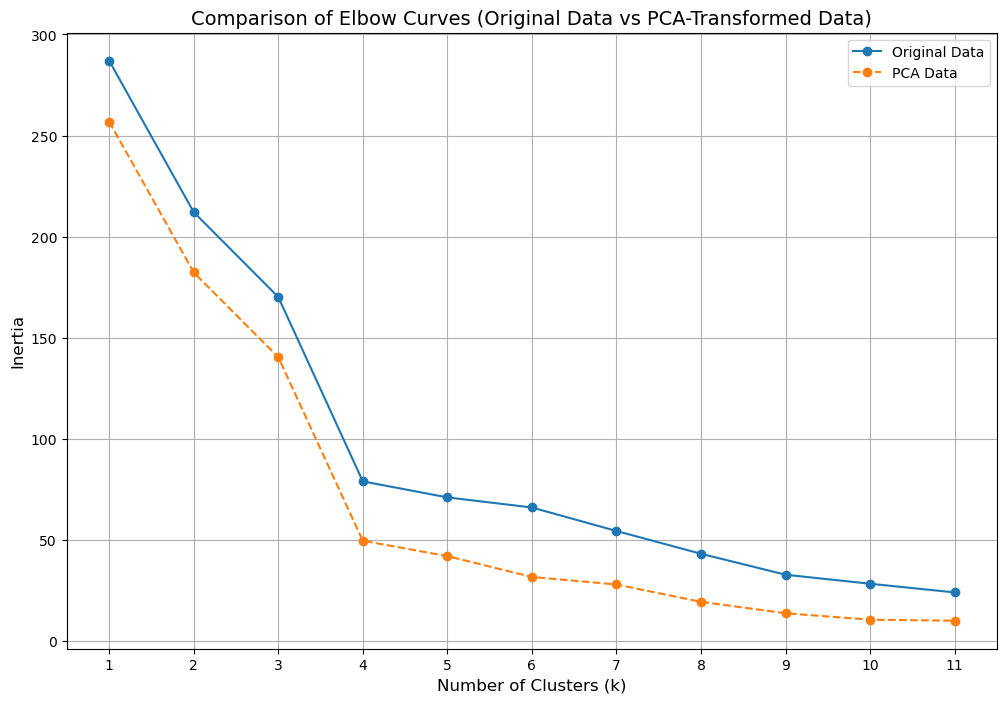

In [74]:
original_inertia = []

for k in range(1, 12):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_market_data_scaled)
    original_inertia.append(kmeans.inertia_)

print("Original Inertia Values:", original_inertia)

original_elbow_data = {
    "k": list(range(1, 12)),
    "inertia": original_inertia
}

pca_elbow_data = {
    "k": list(range(1, 12)),
    "inertia": inertia
}

# Composite plot to contrast the Elbow curves
plt.figure(figsize=(12, 8))
plt.plot(original_elbow_data["k"], original_elbow_data["inertia"], marker='o', linestyle='-', label="Original Data")
plt.plot(pca_elbow_data["k"], pca_elbow_data["inertia"], marker='o', linestyle='--', label="PCA Data")
plt.title("Comparison of Elbow Curves (Original Data vs PCA-Transformed Data)", fontsize=14)
plt.xlabel("Number of Clusters (k)", fontsize=12)
plt.ylabel("Inertia", fontsize=12)
plt.xticks(range(1, 12))
plt.legend()
plt.grid(True)

plt.show()




In [76]:
best_k_original = 4 

kmeans_model_original = KMeans(n_clusters=best_k_original, random_state=42)
kmeans_model_original.fit(df_market_data_scaled)

df_clustered_original = df_scaled.copy()
df_clustered_original["Cluster"] = kmeans_model_original.predict(df_market_data_scaled)

pca_df_clustered["Cluster"] = pca_cluster_labels

# Composite plot to contrast the clusters
scatter_original = df_clustered_original.hvplot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    c="Cluster",
    colormap="Category10",
    title="Clusters: Original Scaled Data",
    hover_cols=["Cluster"]
)

scatter_pca = pca_df_clustered.hvplot.scatter(
    x="PC1",
    y="PC2",
    c="Cluster",
    colormap="Category10",
    title="Clusters: PCA-Transformed Data",
    hover_cols=["Cluster"]
)

composite_plot = scatter_original + scatter_pca

composite_plot.opts(title="Comparison of Clusters (Original vs PCA)")


:Layout
   .Scatter.I  :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,Cluster)
   .Scatter.II :Scatter   [PC1]   (PC2,Cluster)

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** 